# 📈 Technical Analysis – Indicators & Signals

This notebook contains technical analysis of five major technology stocks — Apple (AAPL), Amazon (AMZN), Google (GOOGL), Microsoft (MSFT), and Tesla (TSLA) — from 2020 to 2024.

We include:
- Technical indicators (SMA, EMA, RSI, MACD, Bollinger Bands)
- Daily returns, cumulative returns, and volatility
- Comparative analysis between companies
- Data visualizations and insights


## 1. Setup
- Import libraries
- Load data

In [106]:
import os
import pandas as pd
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL']
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']

# Create folders
os.makedirs('data/stocks', exist_ok=True)

# Calculate daily returns
returns = data.pct_change().dropna()

# Save CSV files
data.to_csv('data/stocks/tech_stocks.csv')
returns.to_csv('data/stocks/tech_returns.csv')

print("Data downloaded and files saved successfully.")


[*********************100%***********************]  5 of 5 completed

Data downloaded and files saved successfully.


In [54]:
tech_stocks = pd.read_csv('data/stocks/tech_stocks.csv', index_col=0, parse_dates=True)
print(tech_stocks.columns)
print(tech_stocks.head())

tech_returns = pd.read_csv('data/stocks/tech_returns.csv', index_col=0, parse_dates=True)
print(tech_returns.columns)
print(tech_returns.head())


Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'], dtype='object')
                 AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620842  94.900497  68.108376  153.042297  28.684000
2020-01-03  71.914810  93.748497  67.752075  151.136688  29.534000
2020-01-06  72.487846  95.143997  69.557945  151.527298  30.102667
2020-01-07  72.146942  95.343002  69.423592  150.145706  31.270666
2020-01-08  73.307510  94.598503  69.917732  152.537323  32.809334
Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'], dtype='object')
                AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007968  0.014886  0.026654  0.002584  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015929  0.049205
2020-01-09  0.021241  0.004799  0.0

## 2. ⚙️ Create functions for indicators

In [157]:
def calculate_sma(data, window=20):
    return data.rolling(window=window).mean()

def calculate_ema(data, window=20):
    return data.ewm(span=window, adjust=False).mean()

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_macd(data):
    ema_12 = calculate_ema(data, 12)
    ema_26 = calculate_ema(data, 26)
    macd = ema_12 - ema_26
    signal = macd.ewm(span=9, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

def calculate_bollinger_bands(data, window=20):
    sma = calculate_sma(data, window)
    std = data.rolling(window=window).std()
    upper = sma + (2 * std)
    lower = sma - (2 * std)
    return sma, upper, lower

## 3. 🔁 Apply functions to assets

In [159]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
results = {}

os.makedirs('outputs/graphs', exist_ok=True)

for ticker in tickers:
    close = tech_stocks[ticker]
    df = pd.DataFrame({'close': close})
    
    # SMA & EMA 
    for w in [10, 20, 50, 100, 200]:
        df[f'sma_{w}'] = calculate_sma(close, w)
        df[f'ema_{w}'] = calculate_ema(close, w)
    
    df['rsi'] = calculate_rsi(close)
    df['macd'], df['macd_signal'], df['macd_hist'] = calculate_macd(close)
    df['bb_sma'], df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(close)

    # Returns and volatility
    df['daily_return'] = close.pct_change()
    df['cumulative_return'] = (1 + df['daily_return']).cumprod()
    df['volatility_10'] = close.rolling(10).std()
    df['volatility_20'] = close.rolling(20).std()

    # Technical indicators
    df['rsi'] = calculate_rsi(close)
    df['macd'], df['macd_signal'], df['macd_hist'] = calculate_macd(close)
    df['bb_sma'], df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(close)

    # Lag features
    for lag in range(1, 6):
        df[f'lag_{lag}'] = close.shift(lag)

    # Save results
    results[ticker] = df
    df.to_csv(f'outputs/{ticker}_indicators.csv')

In [161]:
for ticker in results:
    print(f"\n--- {ticker} ---\n")
    display(pd.DataFrame(results[ticker]).head())


--- AAPL ---



close  sma_10     ema_10  sma_20     ema_20  sma_50  \
Date                                                                  
2020-01-02  72.620842     NaN  72.620842     NaN  72.620842     NaN   
2020-01-03  71.914810     NaN  72.492473     NaN  72.553601     NaN   
2020-01-06  72.487846     NaN  72.491631     NaN  72.547339     NaN   
2020-01-07  72.146942     NaN  72.428961     NaN  72.509206     NaN   
2020-01-08  73.307510     NaN  72.588697     NaN  72.585235     NaN   

               ema_50  sma_100    ema_100  sma_200  ...  bb_lower  \
Date                                                ...             
2020-01-02  72.620842      NaN  72.620842      NaN  ...       NaN   
2020-01-03  72.593154      NaN  72.606861      NaN  ...       NaN   
2020-01-06  72.589025      NaN  72.604504      NaN  ...       NaN   
2020-01-07  72.571688      NaN  72.595444      NaN  ...       NaN   
2020-01-08  72.600544      NaN  72.609544      NaN  ...       NaN   

            daily_return  cumulative_return  volatility_10  volatility_20  \
Date                                                                        
2020-01-02           NaN                NaN            NaN            NaN   
2020-01-03     -0.009722           0.990278            NaN            NaN   
2020-01-06      0.007968           0.998169            NaN            NaN   
2020-01-07     -0.004703           0.993474            NaN            NaN   
2020-01-08      0.016086           1.009456            NaN            NaN   

                lag_1      lag_2      lag_3      lag_4  lag_5  
Date                                                           
2020-01-02        NaN        NaN        NaN        NaN    NaN  
2020-01-03  72.620842        NaN        NaN        NaN    NaN  
2020-01-06  71.914810  72.620842        NaN        NaN    NaN  
2020-01-07  72.487846  71.914810  72.620842        NaN    NaN  
2020-01-08  72.146942  72.487846  71.914810  72.620842    NaN  

[5 rows x 27 columns]


--- AMZN ---



close  sma_10     ema_10  sma_20     ema_20  sma_50  \
Date                                                                  
2020-01-02  94.900497     NaN  94.900497     NaN  94.900497     NaN   
2020-01-03  93.748497     NaN  94.691043     NaN  94.790783     NaN   
2020-01-06  95.143997     NaN  94.773398     NaN  94.824423     NaN   
2020-01-07  95.343002     NaN  94.876963     NaN  94.873811     NaN   
2020-01-08  94.598503     NaN  94.826334     NaN  94.847591     NaN   

               ema_50  sma_100    ema_100  sma_200  ...  bb_lower  \
Date                                                ...             
2020-01-02  94.900497      NaN  94.900497      NaN  ...       NaN   
2020-01-03  94.855321      NaN  94.877686      NaN  ...       NaN   
2020-01-06  94.866642      NaN  94.882959      NaN  ...       NaN   
2020-01-07  94.885322      NaN  94.892069      NaN  ...       NaN   
2020-01-08  94.874075      NaN  94.886256      NaN  ...       NaN   

            daily_return  cumulative_return  volatility_10  volatility_20  \
Date                                                                        
2020-01-02           NaN                NaN            NaN            NaN   
2020-01-03     -0.012139           0.987861            NaN            NaN   
2020-01-06      0.014886           1.002566            NaN            NaN   
2020-01-07      0.002092           1.004663            NaN            NaN   
2020-01-08     -0.007809           0.996818            NaN            NaN   

                lag_1      lag_2      lag_3      lag_4  lag_5  
Date                                                           
2020-01-02        NaN        NaN        NaN        NaN    NaN  
2020-01-03  94.900497        NaN        NaN        NaN    NaN  
2020-01-06  93.748497  94.900497        NaN        NaN    NaN  
2020-01-07  95.143997  93.748497  94.900497        NaN    NaN  
2020-01-08  95.343002  95.143997  93.748497  94.900497    NaN  

[5 rows x 27 columns]


--- GOOGL ---



close  sma_10     ema_10  sma_20     ema_20  sma_50  \
Date                                                                  
2020-01-02  68.108376     NaN  68.108376     NaN  68.108376     NaN   
2020-01-03  67.752075     NaN  68.043594     NaN  68.074442     NaN   
2020-01-06  69.557945     NaN  68.318930     NaN  68.215728     NaN   
2020-01-07  69.423592     NaN  68.519778     NaN  68.330763     NaN   
2020-01-08  69.917732     NaN  68.773951     NaN  68.481903     NaN   

               ema_50  sma_100    ema_100  sma_200  ...  bb_lower  \
Date                                                ...             
2020-01-02  68.108376      NaN  68.108376      NaN  ...       NaN   
2020-01-03  68.094403      NaN  68.101320      NaN  ...       NaN   
2020-01-06  68.151797      NaN  68.130164      NaN  ...       NaN   
2020-01-07  68.201671      NaN  68.155777      NaN  ...       NaN   
2020-01-08  68.268968      NaN  68.190667      NaN  ...       NaN   

            daily_return  cumulative_return  volatility_10  volatility_20  \
Date                                                                        
2020-01-02           NaN                NaN            NaN            NaN   
2020-01-03     -0.005231           0.994769            NaN            NaN   
2020-01-06      0.026654           1.021283            NaN            NaN   
2020-01-07     -0.001932           1.019311            NaN            NaN   
2020-01-08      0.007118           1.026566            NaN            NaN   

                lag_1      lag_2      lag_3      lag_4  lag_5  
Date                                                           
2020-01-02        NaN        NaN        NaN        NaN    NaN  
2020-01-03  68.108376        NaN        NaN        NaN    NaN  
2020-01-06  67.752075  68.108376        NaN        NaN    NaN  
2020-01-07  69.557945  67.752075  68.108376        NaN    NaN  
2020-01-08  69.423592  69.557945  67.752075  68.108376    NaN  

[5 rows x 27 columns]


--- MSFT ---



close  sma_10      ema_10  sma_20      ema_20  sma_50  \
Date                                                                     
2020-01-02  153.042297     NaN  153.042297     NaN  153.042297     NaN   
2020-01-03  151.136688     NaN  152.695823     NaN  152.860811     NaN   
2020-01-06  151.527298     NaN  152.483364     NaN  152.733810     NaN   
2020-01-07  150.145706     NaN  152.058335     NaN  152.487324     NaN   
2020-01-08  152.537323     NaN  152.145424     NaN  152.492085     NaN   

                ema_50  sma_100     ema_100  sma_200  ...  bb_lower  \
Date                                                  ...             
2020-01-02  153.042297      NaN  153.042297      NaN  ...       NaN   
2020-01-03  152.967568      NaN  153.004563      NaN  ...       NaN   
2020-01-06  152.911086      NaN  152.975310      NaN  ...       NaN   
2020-01-07  152.802640      NaN  152.919278      NaN  ...       NaN   
2020-01-08  152.792236      NaN  152.911715      NaN  ...       NaN   

            daily_return  cumulative_return  volatility_10  volatility_20  \
Date                                                                        
2020-01-02           NaN                NaN            NaN            NaN   
2020-01-03     -0.012452           0.987548            NaN            NaN   
2020-01-06      0.002584           0.990101            NaN            NaN   
2020-01-07     -0.009118           0.981073            NaN            NaN   
2020-01-08      0.015929           0.996700            NaN            NaN   

                 lag_1       lag_2       lag_3       lag_4  lag_5  
Date                                                               
2020-01-02         NaN         NaN         NaN         NaN    NaN  
2020-01-03  153.042297         NaN         NaN         NaN    NaN  
2020-01-06  151.136688  153.042297         NaN         NaN    NaN  
2020-01-07  151.527298  151.136688  153.042297         NaN    NaN  
2020-01-08  150.145706  151.527298  151.136688  153.042297    NaN  

[5 rows x 27 columns]


--- TSLA ---



close  sma_10     ema_10  sma_20     ema_20  sma_50  \
Date                                                                  
2020-01-02  28.684000     NaN  28.684000     NaN  28.684000     NaN   
2020-01-03  29.534000     NaN  28.838546     NaN  28.764952     NaN   
2020-01-06  30.102667     NaN  29.068386     NaN  28.892354     NaN   
2020-01-07  31.270666     NaN  29.468800     NaN  29.118860     NaN   
2020-01-08  32.809334     NaN  30.076170     NaN  29.470333     NaN   

               ema_50  sma_100    ema_100  sma_200  ...  bb_lower  \
Date                                                ...             
2020-01-02  28.684000      NaN  28.684000      NaN  ...       NaN   
2020-01-03  28.717333      NaN  28.700832      NaN  ...       NaN   
2020-01-06  28.771660      NaN  28.728591      NaN  ...       NaN   
2020-01-07  28.869660      NaN  28.778929      NaN  ...       NaN   
2020-01-08  29.024157      NaN  28.858739      NaN  ...       NaN   

            daily_return  cumulative_return  volatility_10  volatility_20  \
Date                                                                        
2020-01-02           NaN                NaN            NaN            NaN   
2020-01-03      0.029633           1.029633            NaN            NaN   
2020-01-06      0.019255           1.049458            NaN            NaN   
2020-01-07      0.038801           1.090178            NaN            NaN   
2020-01-08      0.049205           1.143820            NaN            NaN   

                lag_1      lag_2   lag_3   lag_4  lag_5  
Date                                                     
2020-01-02        NaN        NaN     NaN     NaN    NaN  
2020-01-03  28.684000        NaN     NaN     NaN    NaN  
2020-01-06  29.534000  28.684000     NaN     NaN    NaN  
2020-01-07  30.102667  29.534000  28.684     NaN    NaN  
2020-01-08  31.270666  30.102667  29.534  28.684    NaN  

[5 rows x 27 columns]

In [163]:
pd.DataFrame(results['AAPL']).dropna().head()

close      sma_10      ema_10      sma_20      ema_20  \
Date                                                                     
2020-10-15  117.550026  114.628561  115.438422  111.750915  113.853234   
2020-10-16  115.904274  115.212855  115.523123  112.343974  114.048572   
2020-10-19  112.943840  115.162215  115.054162  112.631250  113.943359   
2020-10-20  114.433792  115.585825  114.941368  112.908790  113.990067   
2020-10-21  113.810555  115.760140  114.735765  113.383529  113.972971   

                sma_50      ema_50     sma_100     ema_100    sma_200  ...  \
Date                                                                   ...   
2020-10-15  113.858165  110.363755  101.368509  102.551168  86.063326  ...   
2020-10-16  113.961828  110.581030  101.754489  102.815586  86.279744  ...   
2020-10-19  114.056630  110.673689  102.110525  103.016146  86.484889  ...   
2020-10-20  114.149776  110.821144  102.482214  103.242238  86.694619  ...   
2020-10-21  114.295752  110.938376  102.838169  103.451512  86.902937  ...   

              bb_lower  daily_return  cumulative_return  volatility_10  \
Date                                                                     
2020-10-15  102.487036     -0.003961           1.618682       3.792397   
2020-10-16  103.657043     -0.014000           1.596019       3.444712   
2020-10-19  104.287587     -0.025542           1.555254       3.477073   
2020-10-20  104.722297      0.013192           1.575771       3.034979   
2020-10-21  106.263438     -0.005446           1.567189       2.855178   

            volatility_20       lag_1       lag_2       lag_3       lag_4  \
Date                                                                        
2020-10-15       4.631939  118.017471  117.929802  121.143425  113.907921   
2020-10-16       4.343465  117.550026  118.017471  117.929802  121.143425   
2020-10-19       4.171832  115.904274  117.550026  118.017471  117.929802   
2020-10-20       4.093247  112.943840  115.904274  117.550026  118.017471   
2020-10-21       3.560045  114.433792  112.943840  115.904274  117.550026   

                 lag_5  
Date                    
2020-10-15  111.960297  
2020-10-16  113.907921  
2020-10-19  121.143425  
2020-10-20  117.929802  
2020-10-21  118.017471  

[5 rows x 27 columns]

## 4. 📈 View one by one

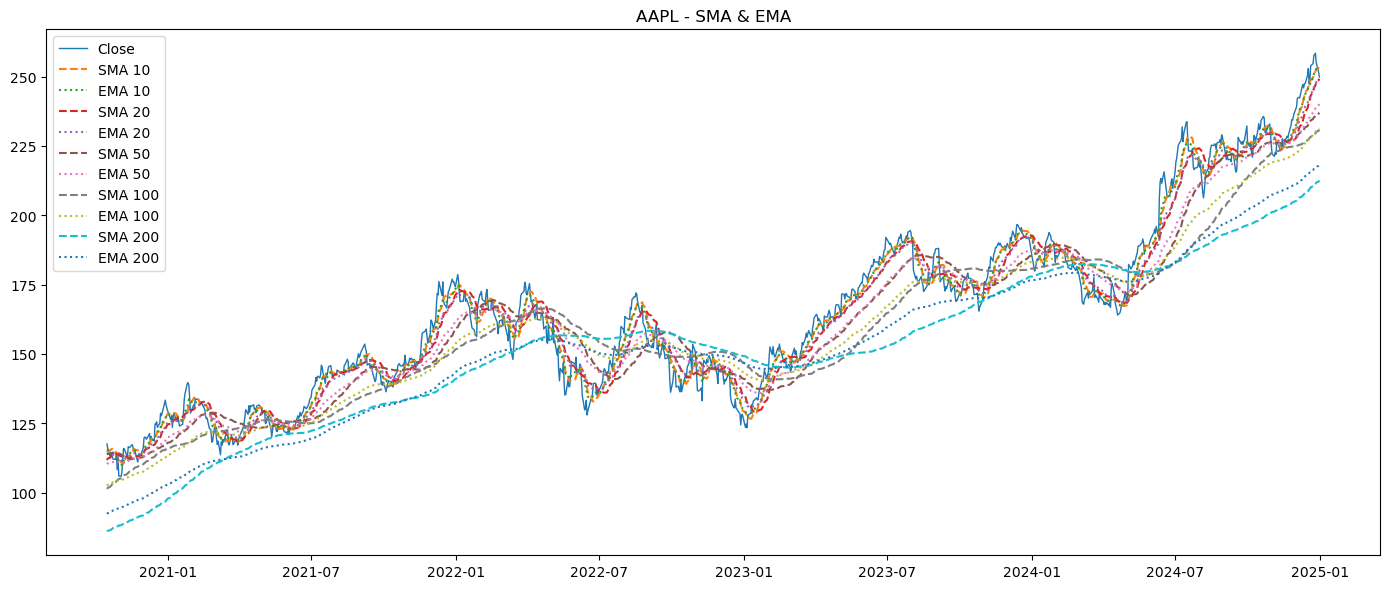

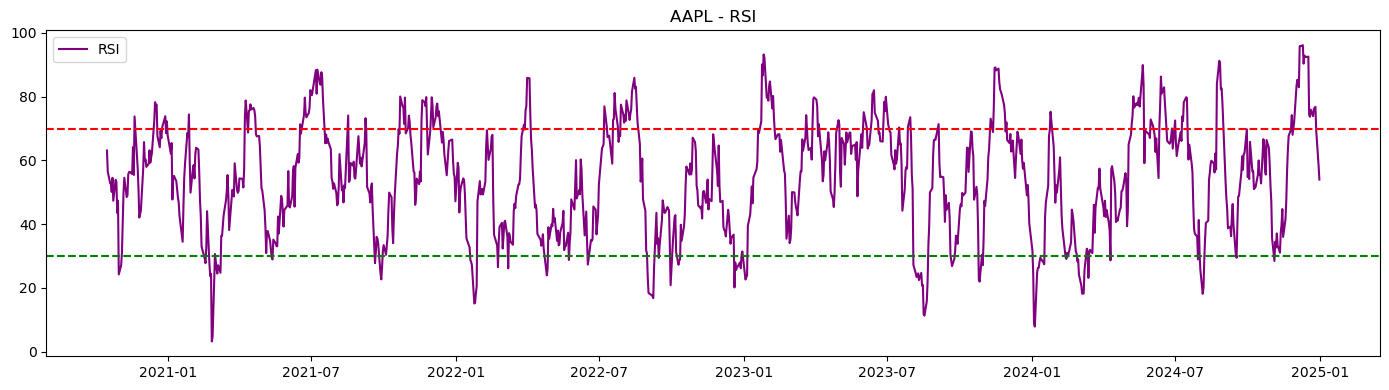

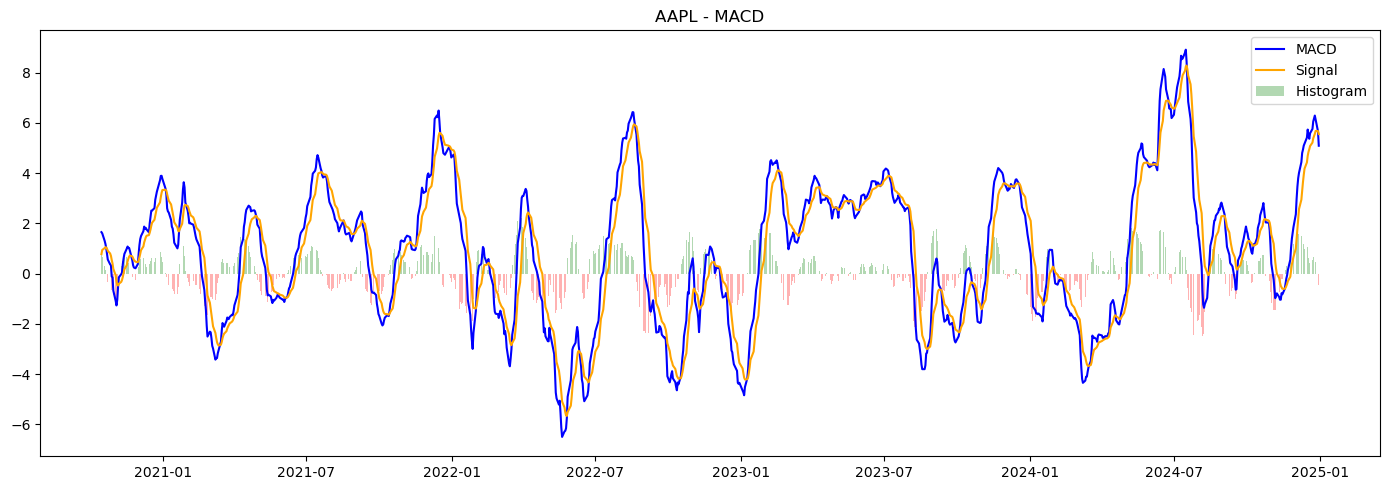

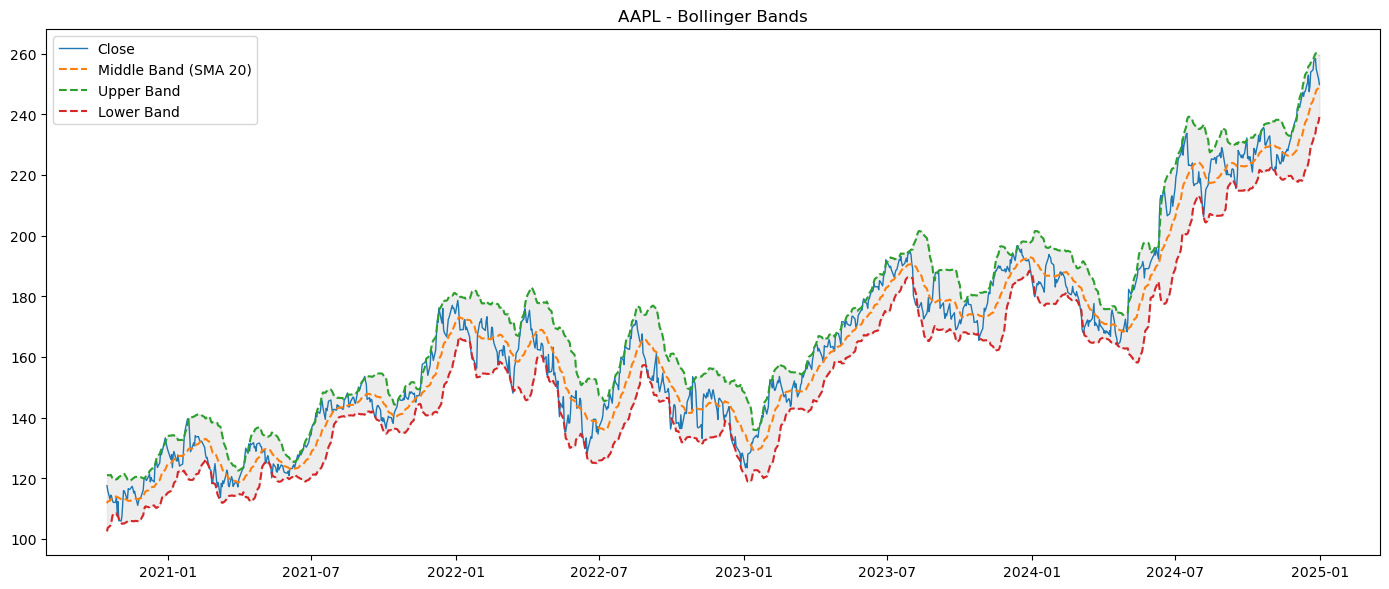

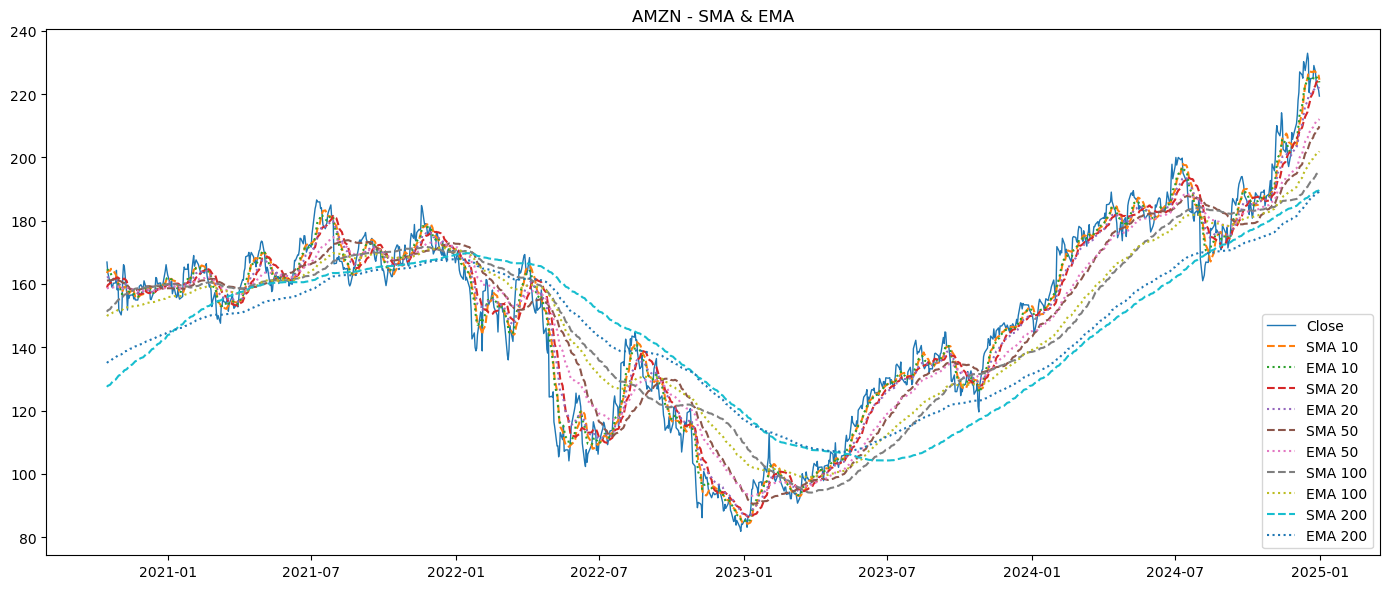

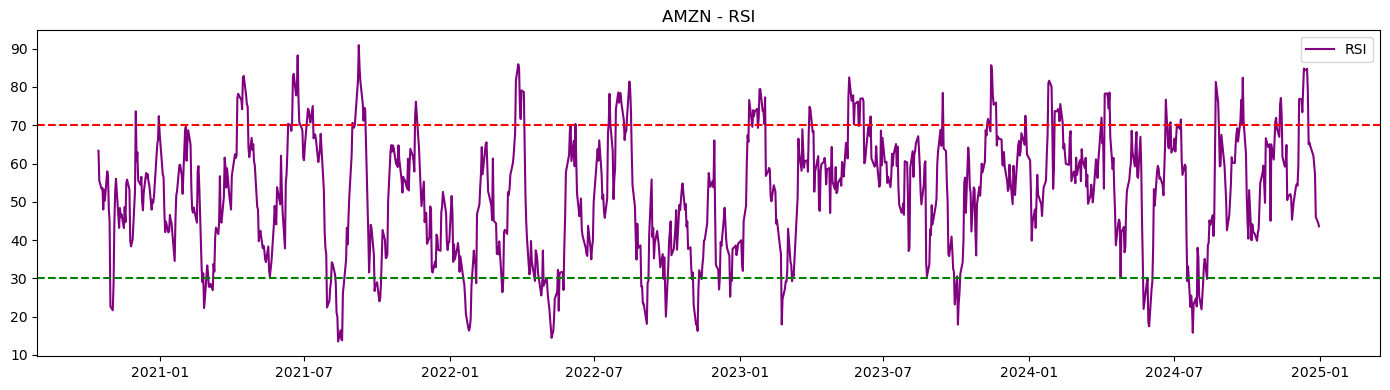

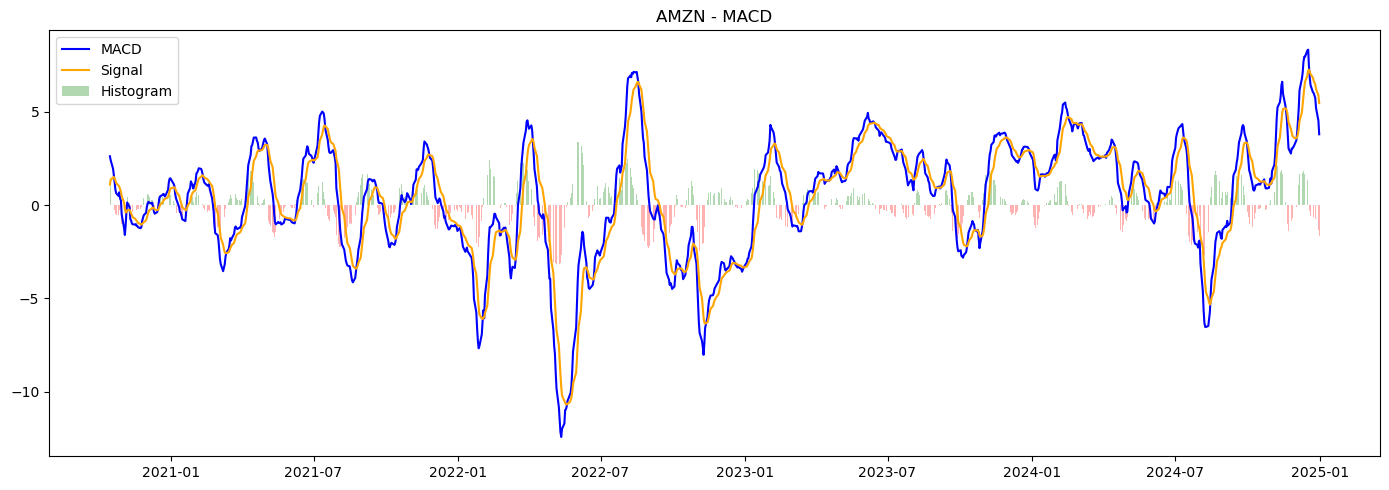

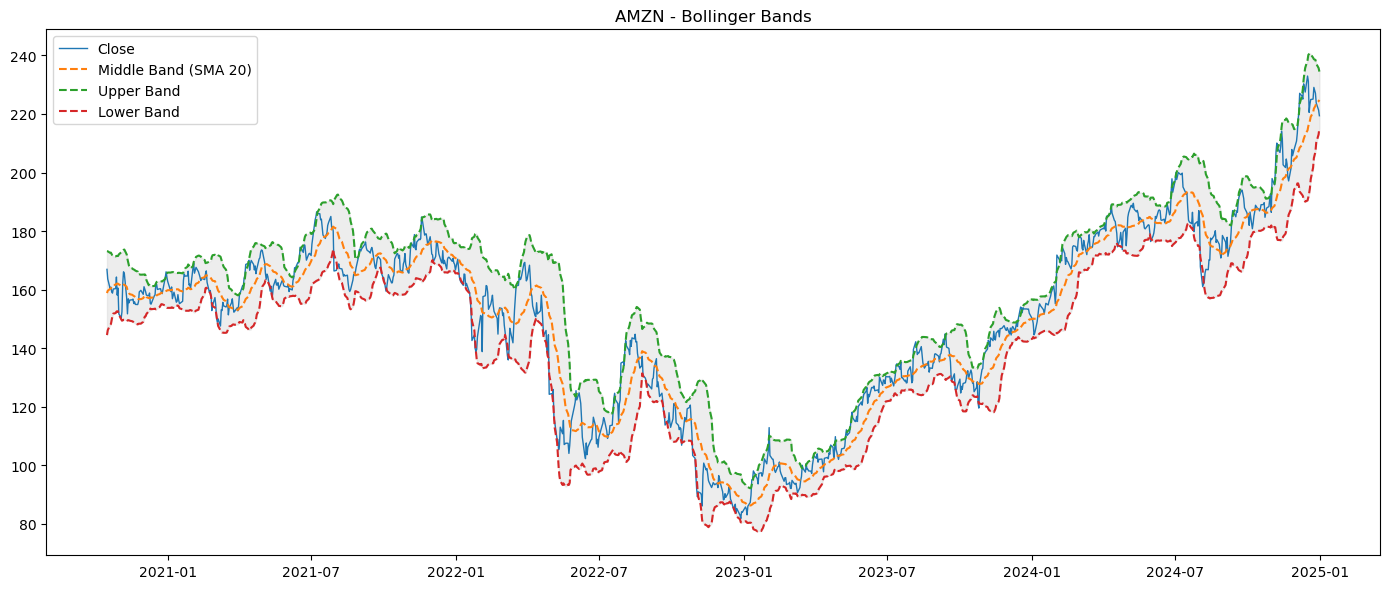

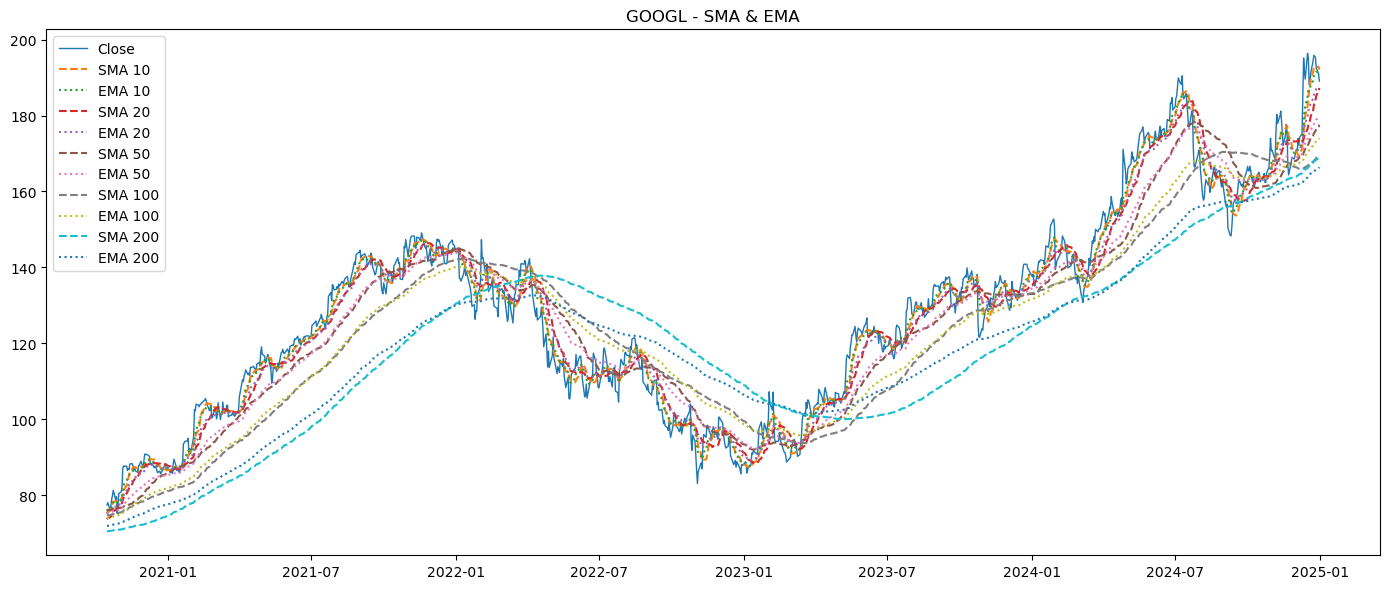

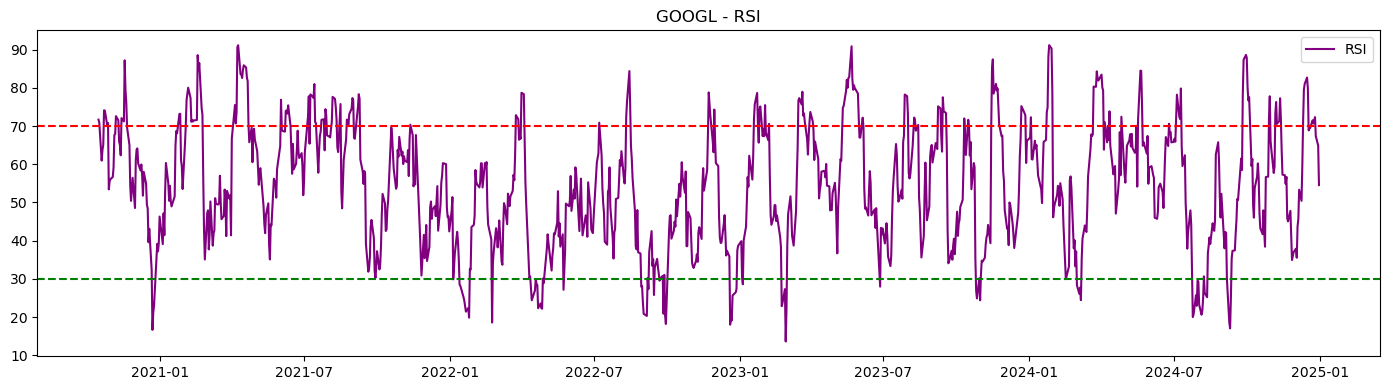

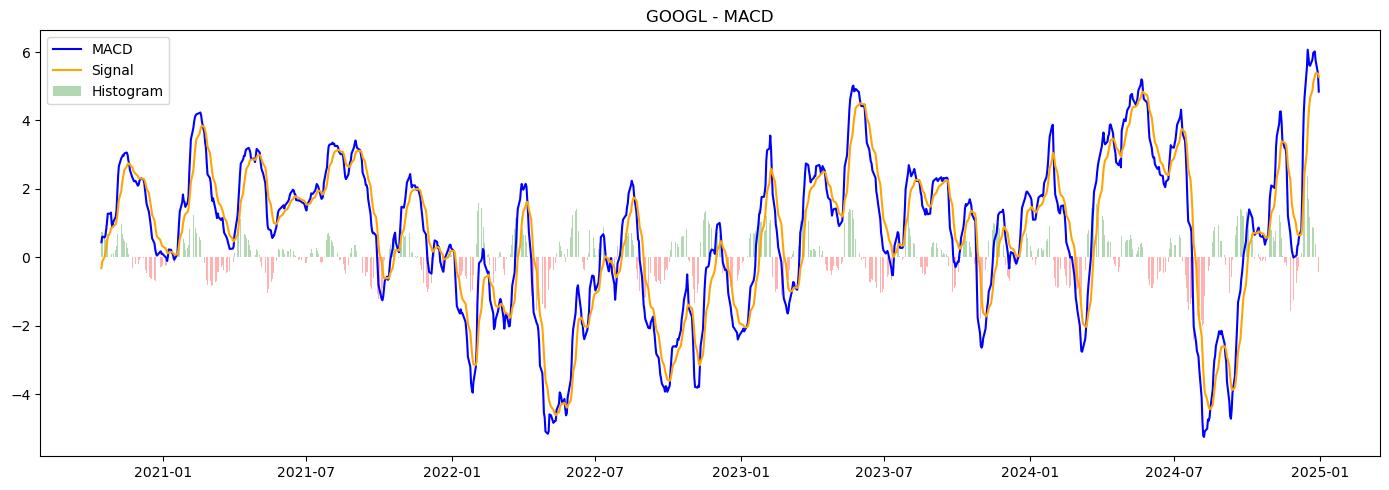

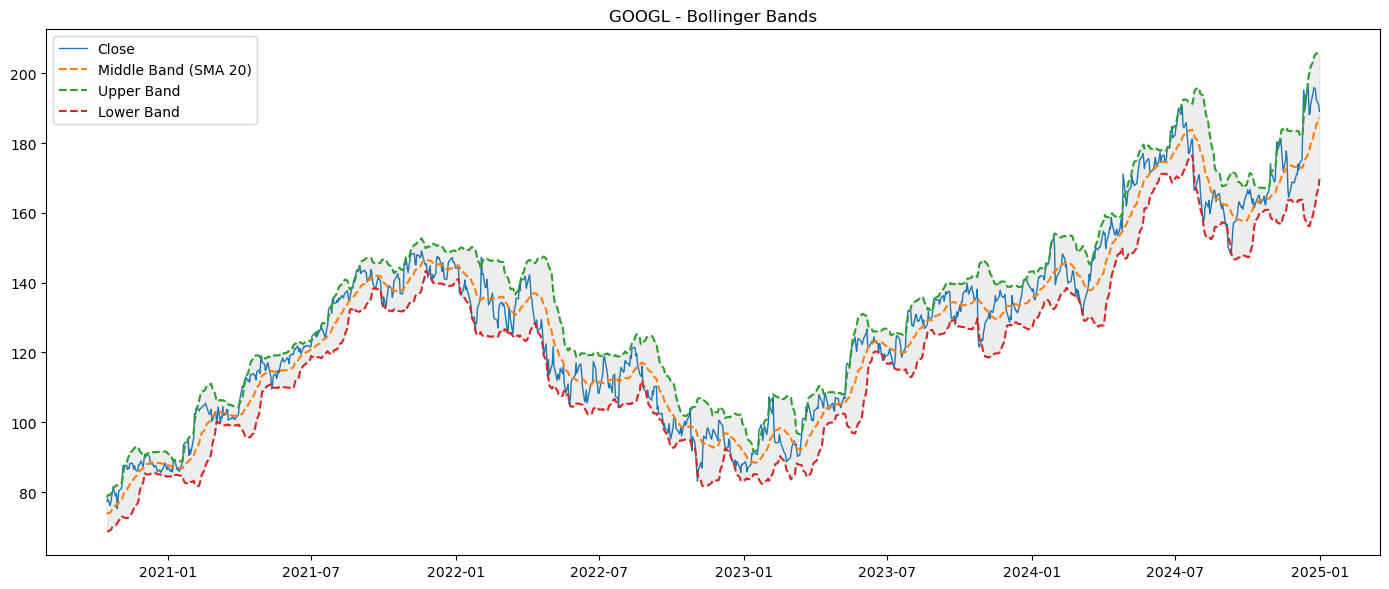

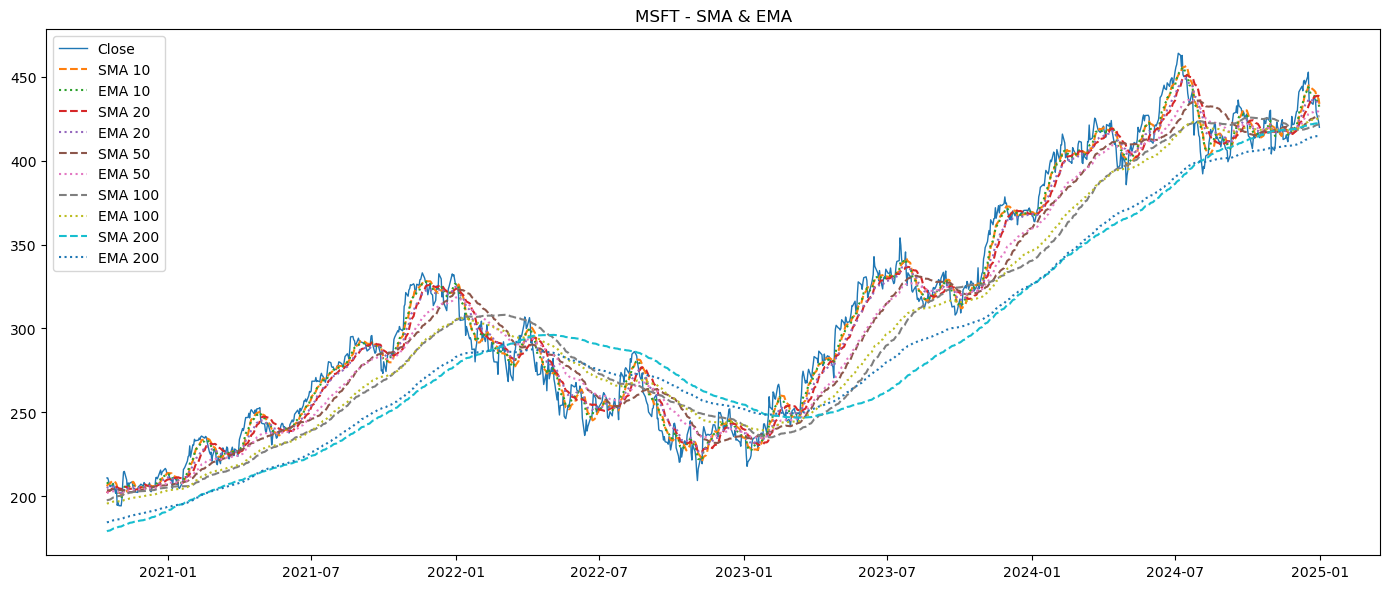

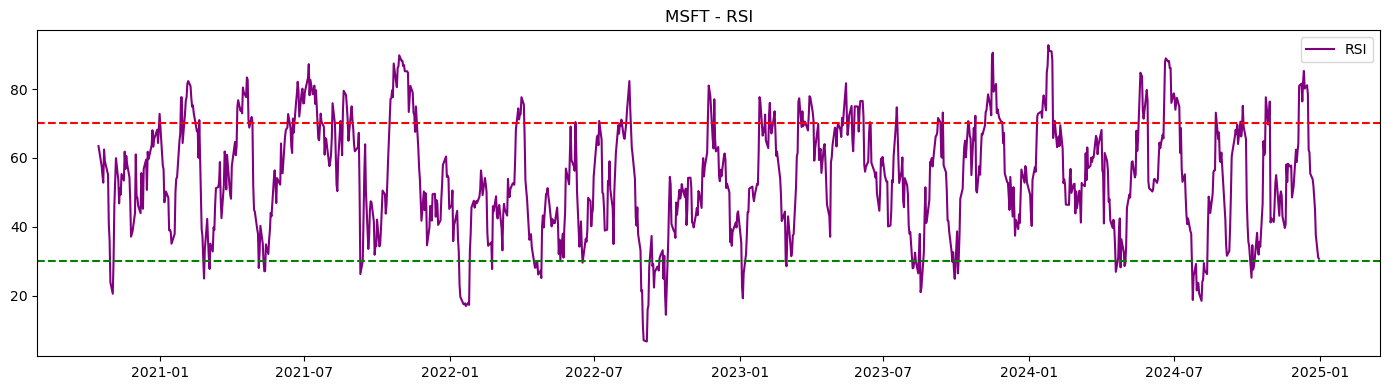

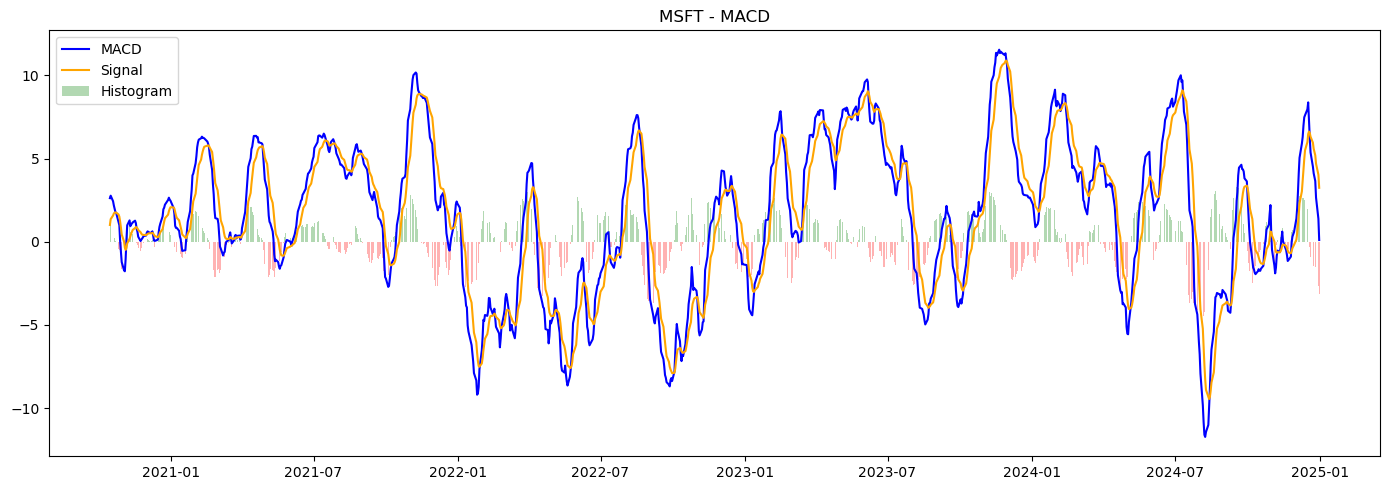

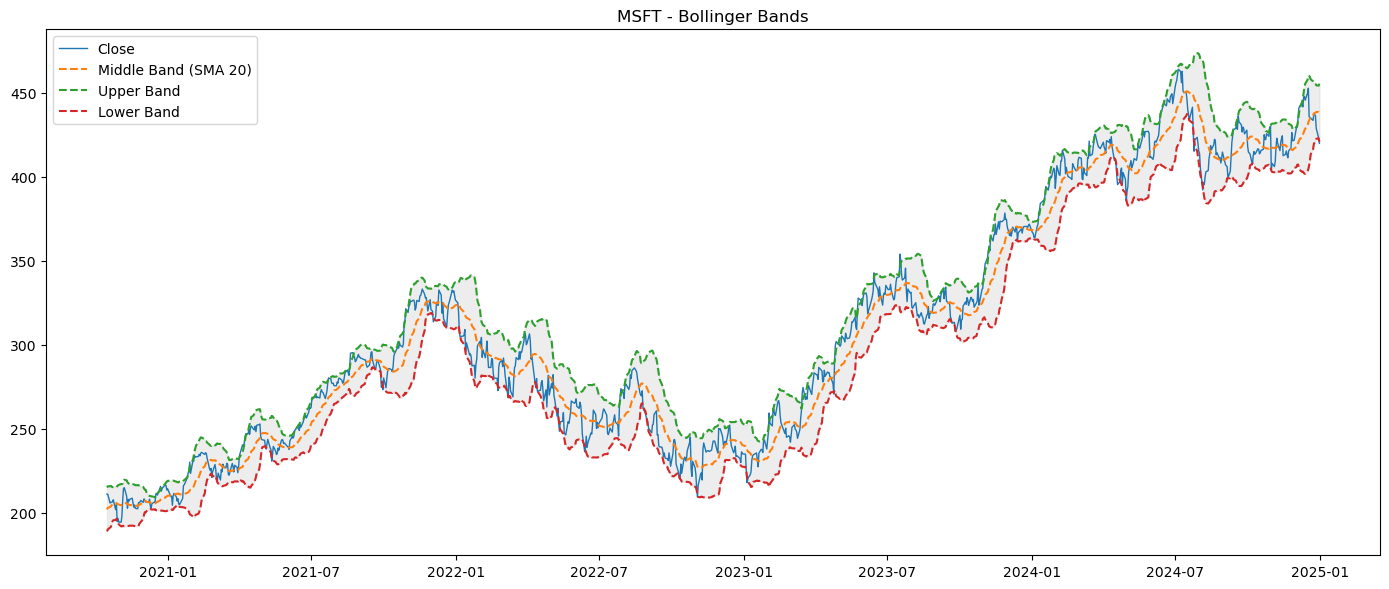

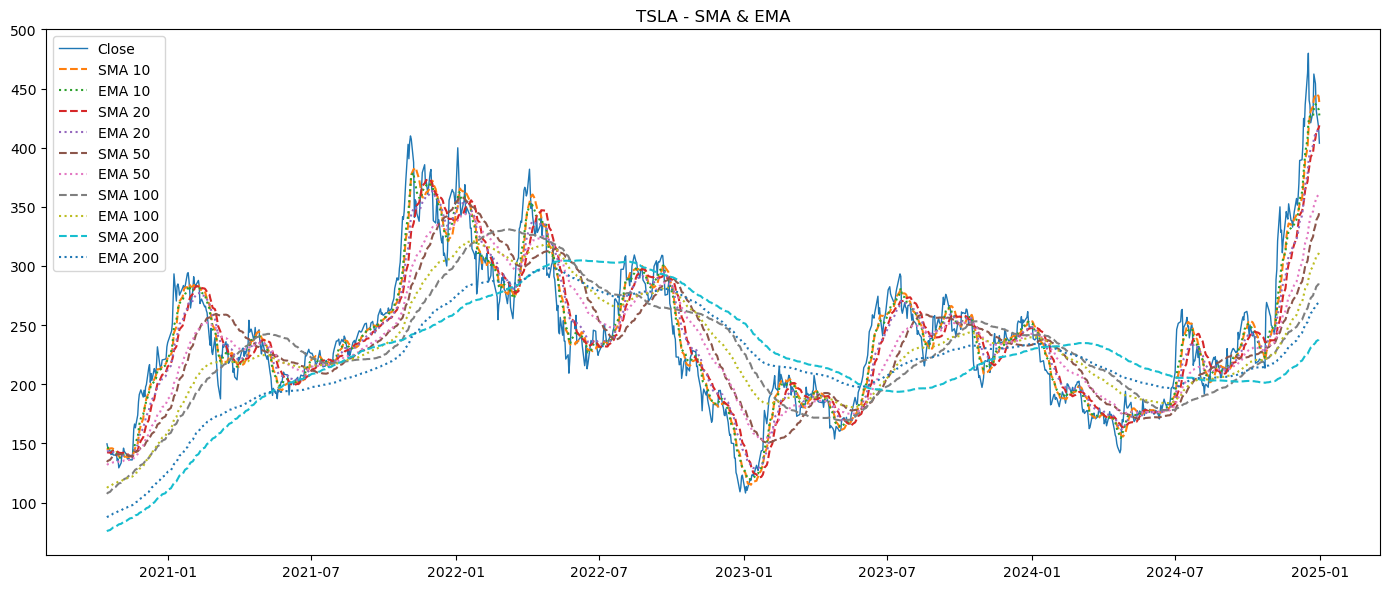

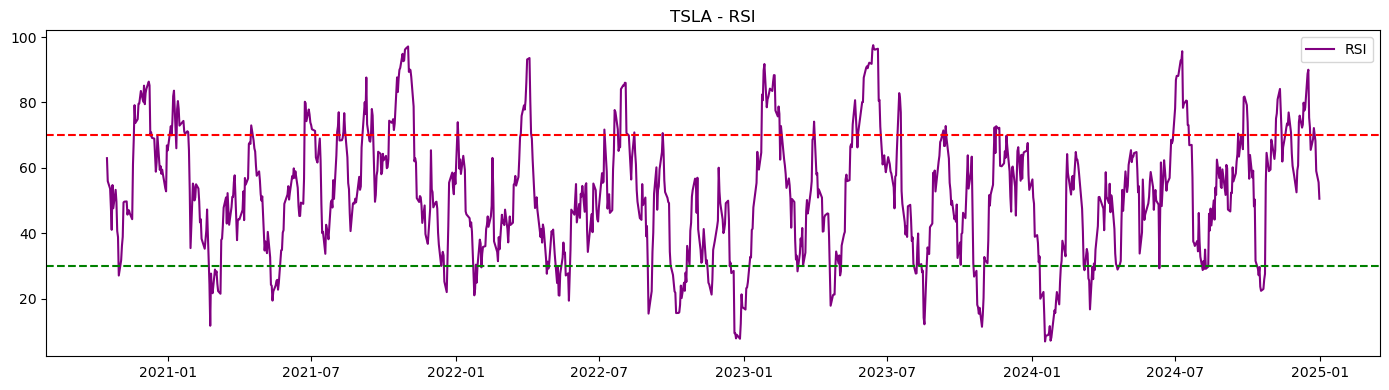

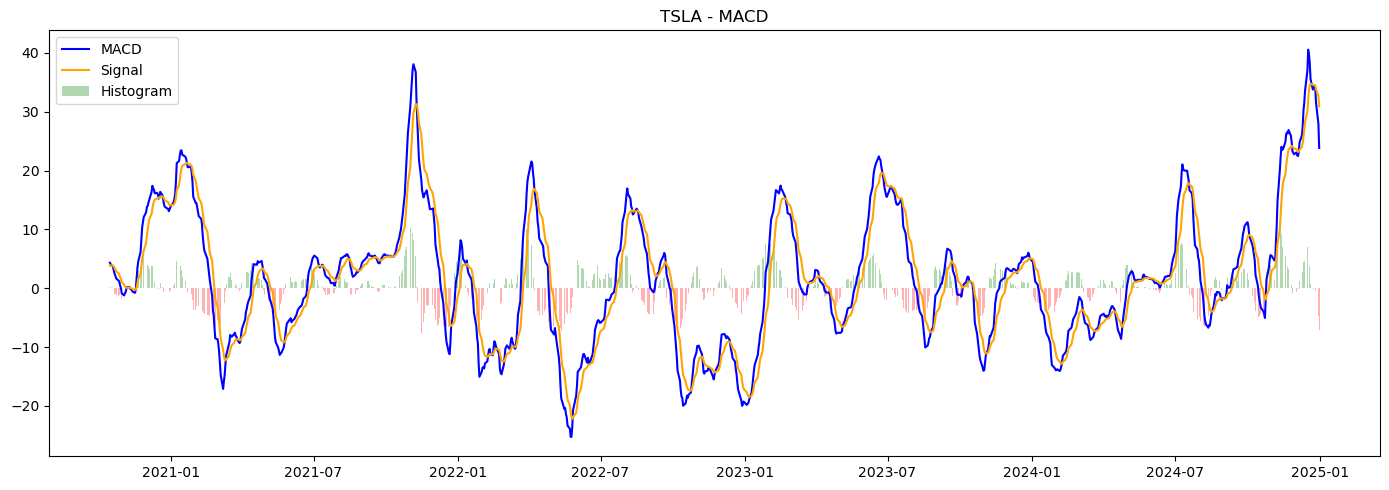

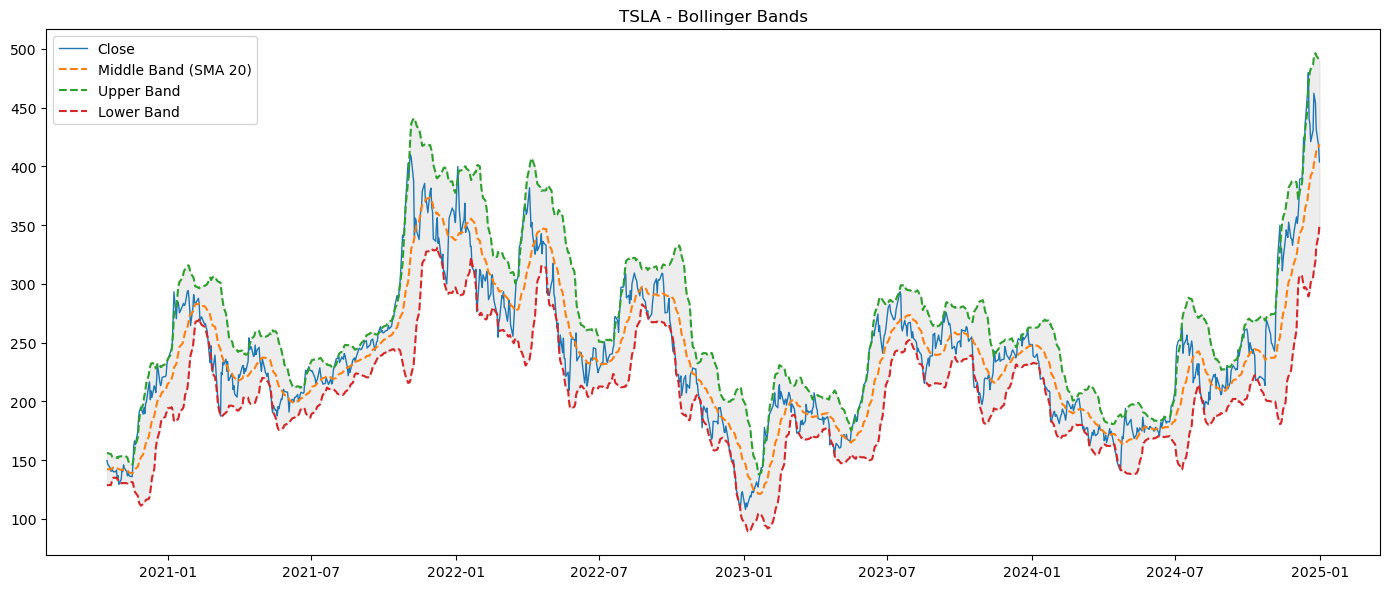

In [175]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.makedirs('outputs/graphs/graphs_secpart', exist_ok=True)

tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']

for ticker in tickers:
    r = results.get(ticker, None)
    if r is None:
        print(f"No hay datos para {ticker}")
        continue

    df = pd.DataFrame(r).dropna()

    # Necessary columns
    keys_needed = ['close', 'rsi', 'macd', 'macd_signal', 'macd_hist', 'bb_sma', 'bb_upper', 'bb_lower']
    for w in [10, 20, 50, 100, 200]:
        keys_needed.append(f'sma_{w}')
        keys_needed.append(f'ema_{w}')

    # Verify that all columns exist
    if any(k not in df.columns for k in keys_needed):
        faltantes = [k for k in keys_needed if k not in df.columns]
        print(f"Faltan claves para {ticker}: {faltantes}")
        print(f"Claves disponibles: {df.columns.tolist()}")
        continue

    # Graph SMA y EMA
    plt.figure(figsize=(14,6))
    plt.plot(df['close'], label='Close', linewidth=1)
    for w in [10, 20, 50, 100, 200]:
        plt.plot(df[f'sma_{w}'], label=f'SMA {w}', linestyle='--')
        plt.plot(df[f'ema_{w}'], label=f'EMA {w}', linestyle=':')
    plt.title(f"{ticker} - SMA & EMA")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'outputs/graphs/graphs_secpart/{ticker}_sma_ema.png')
    plt.show()

    # Graph RSI
    plt.figure(figsize=(14,4))
    plt.plot(df['rsi'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f"{ticker} - RSI")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'outputs/graphs/graphs_secpart/{ticker}_rsi.png')
    plt.show()

    # Graph MACD
    plt.figure(figsize=(14,5))
    plt.plot(df['macd'], label='MACD', color='blue')
    plt.plot(df['macd_signal'], label='Signal', color='orange')
    plt.bar(df.index, df['macd_hist'], label='Histogram', color=np.where(df['macd_hist'] >= 0, 'green', 'red'), alpha=0.3)
    plt.title(f"{ticker} - MACD")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'outputs/graphs/graphs_secpart/{ticker}_macd.png')
    plt.show()

    # Graph Bollinger Bands
    plt.figure(figsize=(14,6))
    plt.plot(df['close'], label='Close', linewidth=1)
    plt.plot(df['bb_sma'], label='Middle Band (SMA 20)', linestyle='--')
    plt.plot(df['bb_upper'], label='Upper Band', linestyle='--')
    plt.plot(df['bb_lower'], label='Lower Band', linestyle='--')
    plt.fill_between(df.index, df['bb_upper'], df['bb_lower'], color='lightgrey', alpha=0.4)
    plt.title(f"{ticker} - Bollinger Bands")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'outputs/graphs/graphs_secpart/{ticker}_bollinger.png')
    plt.show()


## Compare cumulative returns and volatility

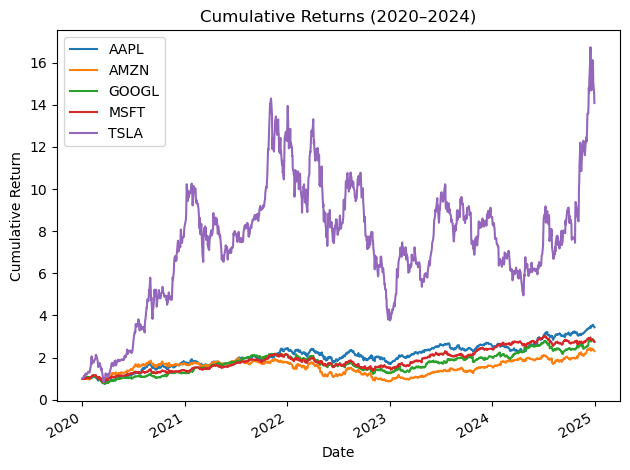

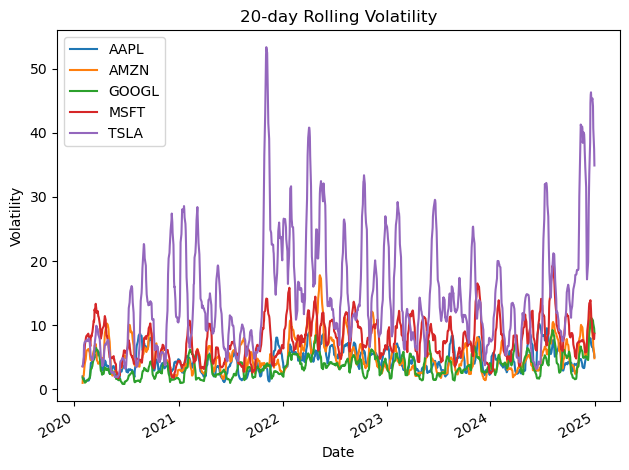

In [177]:
    # Compare cumulative returns
    cumulative_returns = pd.DataFrame({ticker: results[ticker]['cumulative_return'] for ticker in tickers})
    cumulative_returns.plot(title='Cumulative Returns (2020–2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.tight_layout()
    plt.savefig('outputs/graphs/graphs_secpart/cumulative_returns_comparison.png')
    plt.show()

    # Compare volatility
    volatility = pd.DataFrame({ticker: results[ticker]['volatility_20'] for ticker in tickers})
    volatility.plot(title='20-day Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.tight_layout()
    plt.savefig('outputs/graphs/graphs_secpart/volatility_comparison.png')
    plt.show()

## 5. 💾 Save indicators

In [147]:
import os

os.makedirs('technical_indicators', exist_ok=True)

for ticker in tickers:
    df = pd.DataFrame(results[ticker])
    
    df.index = pd.to_datetime(df.index)
    
    file_path = f'technical_indicators/{ticker}_technical_indicators.csv'
    df.to_csv(file_path, index_label='Date', float_format='%.6f')


In [173]:
# Final value snapshot
summary = pd.DataFrame({
    'Final Cumulative Return': {ticker: results[ticker]['cumulative_return'].dropna().iloc[-1] for ticker in tickers},
    'Latest RSI': {ticker: results[ticker]['rsi'].dropna().iloc[-1] for ticker in tickers},
    'Latest Volatility (20d)': {ticker: results[ticker]['volatility_20'].dropna().iloc[-1] for ticker in tickers},
    'Latest MACD': {ticker: results[ticker]['macd'].dropna().iloc[-1] for ticker in tickers}
})
summary.to_csv('../outputs/tables/summary_snapshot.csv')
display(summary)

Final Cumulative Return  Latest RSI  Latest Volatility (20d)  \
AAPL                  3.440023   53.982563                 5.051696   
AMZN                  2.311790   43.592653                 4.839531   
GOOGL                 2.776197   54.545464                 8.816092   
MSFT                  2.743592   30.793555                 8.656636   
TSLA                 14.078929   50.568478                34.917016   

       Latest MACD  
AAPL      5.090100  
AMZN      3.798038  
GOOGL     4.843759  
MSFT      0.104509  
TSLA     23.836484

# 📊 Technical analysis of technology stocks (AAPL, AMZN, GOOGL, MSFT, TSLA)

##  Objective

Apply technical analysis tools to evaluate **trends**, **momentum**, and **volatility** across five major technology stocks. The analysis integrates:

- **SMA & EMA** (10, 20, 50, 100, 200 days)
- **RSI (14-day)**
- **MACD (12, 26, 9)**
- **Bollinger Bands (20 SMA ± 2σ)**
- **Cumulative Return**, **20-day Volatility**, **Latest RSI**, **Latest MACD**

---

## 1.  Moving averages (SMA & EMA)

- **SMA** smooths price action over time.
- **EMA** emphasizes recent price changes, reacting faster.

**Interpretation:**
- Price > both EMA and SMA → Uptrend confirmation.
- EMA crosses first → earlier signal than SMA.

---

## 2.  RSI (Relative strength index – 14d)

- **>70**: Overbought → potential pullback
- **<30**: Oversold → potential rebound
- **30–70**: Neutral

**Latest RSI readings:**

| Stock | RSI |
|-------|-----|
| AAPL  | 53.98 |
| AMZN  | 43.59 |
| GOOGL | 54.55 |
| MSFT  | 30.79 |
| TSLA  | 50.56 |

 **Insights**:
- **MSFT** approaching oversold → early rebound potential
- **AAPL** and **GOOGL** in bullish-neutral zones

---

## 3.  MACD (12, 26, 9)

- MACD = EMA(12) − EMA(26)
- Signal = EMA(9) of MACD
- Histogram = MACD − Signal

**Signals:**
- MACD > Signal → Bullish momentum
- MACD < Signal → Bearish reversal
- Rising histogram → Momentum accelerating

| Stock | MACD |
|-------|------|
| AAPL  | 5.09 |
| AMZN  | 3.80 |
| GOOGL | 4.84 |
| MSFT  | 0.10 |
| TSLA  | 23.84 |

 **Notable**: **TSLA** shows extreme MACD → strong but possibly unstable momentum.

---

## 4.  Bollinger bands (SMA 20 ± 2σ)

- Measures **volatility**
- Price near upper band → overbought / strong breakout
- Band compression → upcoming price expansion

 Example: **GOOGL** shows sustained compression → breakout potential.

---

## 5.  Cumulative return & volatility

| Stock | Final Cumulative Return | 20-Day Volatility |
|-------|--------------------------|--------------------|
| AAPL  | 3.44%                    | 5.05%              |
| AMZN  | 2.31%                    | 4.84%              |
| GOOGL | 2.78%                    | 8.82%              |
| MSFT  | 2.74%                    | 8.66%              |
| TSLA  | **14.08%**               | **34.92%**         |

📌 **Interpretation**:
- **TSLA** offers high return with high volatility → aggressive profile
- **AAPL** has best risk-return ratio in the group
- **GOOGL** and **MSFT** are more volatile with moderate returns

---

##  Combined analysis

Example: **AAPL**
- Price > EMA20
- RSI rising around 50
- MACD positive and growing
 **Composite Buy Signal**

📌 **Signal alignment is stronger than isolated indicators**.

---

##  Strategic observations

- **Divergence** (price vs RSI or MACD) signals potential reversals
- **Typical sequence**:  
  RSI leads → MACD confirms → Price crosses MA
- Can be integrated into **rule-based trading models**

---

## ✅ Summary table

| Stock | Trend   | Momentum     | Volatility | Observation                                  |
|-------|---------|--------------|------------|----------------------------------------------|
| AAPL  | Bullish | Strong       | Medium     | Positive signals across all indicators       |
| AMZN  | Bullish | Saturated    | Medium     | RSI moderating – watch for exhaustion        |
| GOOGL | Sideways| Weak         | Low        | Compressed bands – potential breakout        |
| MSFT  | Bullish | Recovering   | Medium     | Oversold RSI – early momentum rebuilding     |
| TSLA  | Bullish | Aggressive   | **High**   | Caution – high momentum + volatility         |

---

## 🔍 Anomaly detection

In [191]:
from scipy.stats import zscore
import os

os.makedirs('data/final', exist_ok=True)

for ticker, df in results.items():
    
    df = df.copy()
    df['zscore_return'] = zscore(df['daily_return'].fillna(0))
    df['is_anomaly_return'] = df['zscore_return'].abs() > 3
    df['is_anomaly_rsi'] = (df['rsi'] > 90) | (df['rsi'] < 10)
    threshold_vol = df['volatility_20'].quantile(0.95)
    df['is_anomaly_volatility'] = df['volatility_20'] > threshold_vol
    df['is_anomaly'] = df[['is_anomaly_return', 'is_anomaly_rsi', 'is_anomaly_volatility']].any(axis=1)

    # Save final file
    df.to_csv(f'data/final/{ticker}_model_ready.csv', index=True)
    
    results[ticker] = df

In [199]:
for ticker, df in results.items():
    print(f"\n🔍 {ticker} - Total anomalies detected: {df['is_anomaly'].sum()}")
    display(df[df['is_anomaly']].head(2))  # Shows the first 2 anomalies


🔍 AAPL - Total anomalies detected: 97


close     sma_10     ema_10     sma_20     ema_20  sma_50  \
Date                                                                        
2020-02-27  66.290642  74.604113  73.046415  75.975920  74.699708     NaN   
2020-03-02  72.419960  72.722179  71.921752  75.252346  73.754656     NaN   

               ema_50  sma_100    ema_100  sma_200  ...      lag_1      lag_2  \
Date                                                ...                         
2020-02-27  74.911577      NaN  74.251701      NaN  ...  70.927002  69.819412   
2020-03-02  74.487587      NaN  74.060152      NaN  ...  66.251846  66.290642   

                lag_3      lag_4      lag_5  zscore_return  is_anomaly_return  \
Date                                                                            
2020-02-27  72.267265  75.871162  77.628304      -3.337505               True   
2020-03-02  70.927002  69.819412  72.267265       4.609864               True   

            is_anomaly_rsi  is_anomaly_volatility  is_anomaly  
Date                                                           
2020-02-27           False                  False        True  
2020-03-02           False                  False        True  

[2 rows x 32 columns]


🔍 AMZN - Total anomalies detected: 79


close     sma_10     ema_10     sma_20     ema_20  sma_50  \
Date                                                                         
2020-01-31  100.435997  94.046949  94.613263  94.177449  94.364920     NaN   
2020-03-12   83.830498  93.687700  93.066790  98.607900  95.964462     NaN   

               ema_50  sma_100    ema_100  sma_200  ...      lag_1      lag_2  \
Date                                                ...                         
2020-01-31  94.508999      NaN  94.662593      NaN  ...  93.533997  92.900002   
2020-03-12  97.222554      NaN  96.687687      NaN  ...  91.042999  94.591003   

                lag_3      lag_4      lag_5  zscore_return  is_anomaly_return  \
Date                                                                            
2020-01-31  92.662498  91.417000  93.082001       3.218993               True   
2020-03-12  90.030502  95.054497  96.201500      -3.540345               True   

            is_anomaly_rsi  is_anomaly_volatility  is_anomaly  
Date                                                           
2020-01-31           False                  False        True  
2020-03-12           False                  False        True  

[2 rows x 32 columns]


🔍 GOOGL - Total anomalies detected: 83


close     sma_10     ema_10     sma_20     ema_20  sma_50  \
Date                                                                        
2020-03-09  60.500252  66.496682  66.515371  70.654728  68.772627     NaN   
2020-03-12  55.313049  64.037839  63.175103  68.316581  66.342422     NaN   

               ema_50  sma_100    ema_100  sma_200  ...      lag_1      lag_2  \
Date                                                ...                         
2020-03-09  70.119311      NaN  69.822105      NaN  ...  64.478737  65.425209   
2020-03-12  68.925834      NaN  69.228002      NaN  ...  60.256912  63.455124   

                lag_3      lag_4      lag_5  zscore_return  is_anomaly_return  \
Date                                                                            
2020-03-09  68.751305  66.567741  68.986176      -3.066259               True   
2020-03-12  60.500252  64.478737  65.425209      -4.060785               True   

            is_anomaly_rsi  is_anomaly_volatility  is_anomaly  
Date                                                           
2020-03-09           False                  False        True  
2020-03-12           False                  False        True  

[2 rows x 32 columns]


🔍 MSFT - Total anomalies detected: 82


close      sma_10      ema_10      sma_20      ema_20  \
Date                                                                     
2020-02-27  151.129089  169.337061  165.625875  170.554971  166.940753   
2020-03-02  165.087830  166.159825  163.915859  170.207407  165.717140   

            sma_50      ema_50  sma_100     ema_100  sma_200  ...       lag_1  \
Date                                                          ...               
2020-02-27     NaN  163.082939      NaN  159.311946      NaN  ...  162.584625   
2020-03-02     NaN  162.849042      NaN  159.338518      NaN  ...  154.788376   

                 lag_2       lag_3       lag_4       lag_5  zscore_return  \
Date                                                                        
2020-02-27  160.578247  163.272522  170.629288  176.199432      -3.721881   
2020-03-02  151.129089  162.584625  160.578247  163.272522       3.414839   

            is_anomaly_return  is_anomaly_rsi  is_anomaly_volatility  \
Date                                                                   
2020-02-27               True           False                  False   
2020-03-02               True           False                  False   

            is_anomaly  
Date                    
2020-02-27        True  
2020-03-02        True  

[2 rows x 32 columns]


🔍 TSLA - Total anomalies detected: 110


close     sma_10     ema_10     sma_20     ema_20  sma_50  \
Date                                                                        
2020-02-03  52.000000  40.207133  41.213456  36.695233  37.803305     NaN   
2020-02-04  59.137333  42.472867  44.472342  38.146966  39.835117     NaN   

               ema_50  sma_100    ema_100  sma_200  ...      lag_1      lag_2  \
Date                                                ...                         
2020-02-03  33.665627      NaN  31.501129      NaN  ...  43.371334  42.720669   
2020-02-04  34.664517      NaN  32.048380      NaN  ...  52.000000  43.371334   

                lag_3      lag_4      lag_5  zscore_return  is_anomaly_return  \
Date                                                                            
2020-02-03  38.732666  37.793331  37.201332       4.633916               True   
2020-02-04  42.720669  38.732666  37.793331       3.175017               True   

            is_anomaly_rsi  is_anomaly_volatility  is_anomaly  
Date                                                           
2020-02-03           False                  False        True  
2020-02-04            True                  False        True  

[2 rows x 32 columns]

In [201]:
ticker = 'TSLA'  # Ticker example
df = results[ticker]

anomalies = df[df['is_anomaly']]

# View key columns
display(anomalies[['close', 'daily_return', 'rsi', 'volatility_20',
                   'is_anomaly_return', 'is_anomaly_rsi', 'is_anomaly_volatility']].head())

close  daily_return        rsi  volatility_20  \
Date                                                            
2020-02-03  52.000000      0.198949  87.704673       5.021680   
2020-02-04  59.137333      0.137256  90.377940       6.871617   
2020-02-05  48.980000     -0.171758  69.123265       7.076847   
2020-02-27  45.266666     -0.128146  41.939342       5.270749   
2020-03-09  40.533333     -0.135725  26.582374       5.361982   

            is_anomaly_return  is_anomaly_rsi  is_anomaly_volatility  
Date                                                                  
2020-02-03               True           False                  False  
2020-02-04               True            True                  False  
2020-02-05               True           False                  False  
2020-02-27               True           False                  False  
2020-03-09               True           False                  False

## 📊 Anomalies on price series

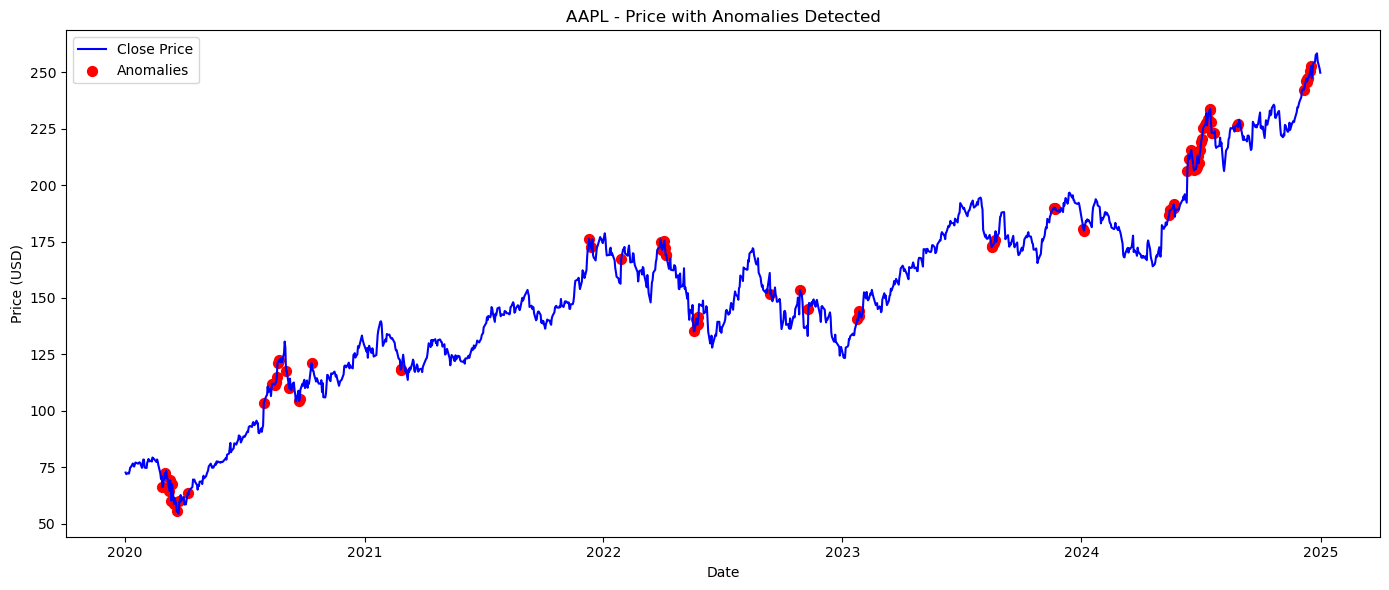

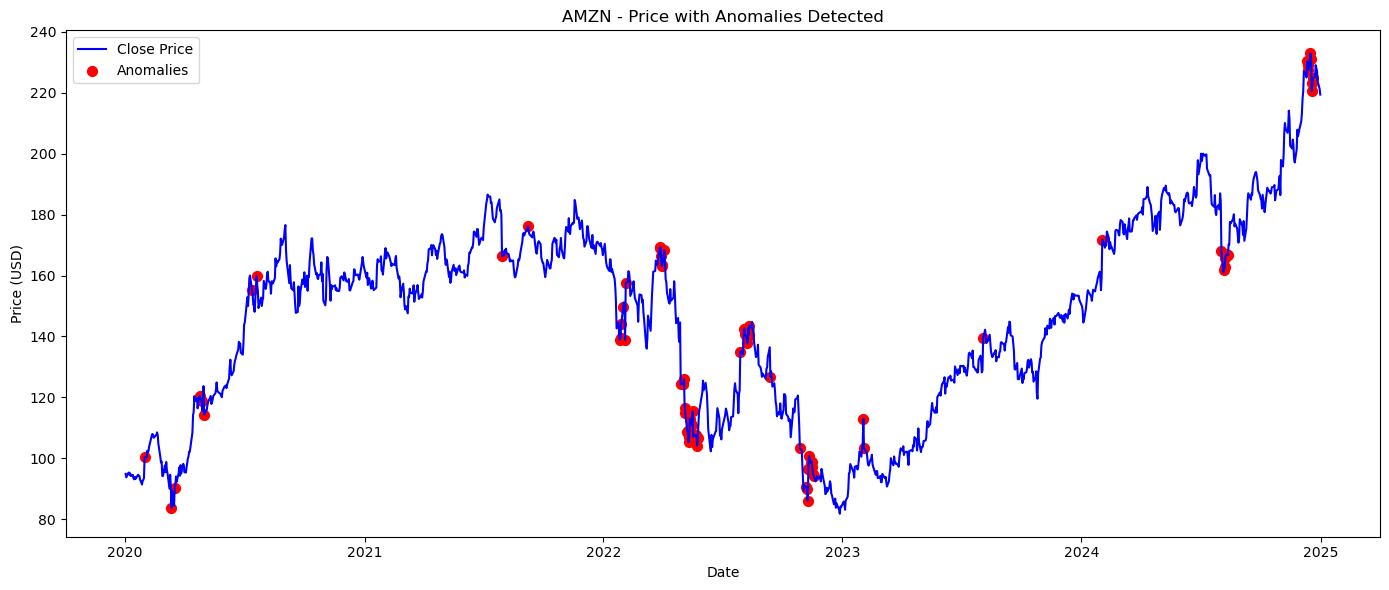

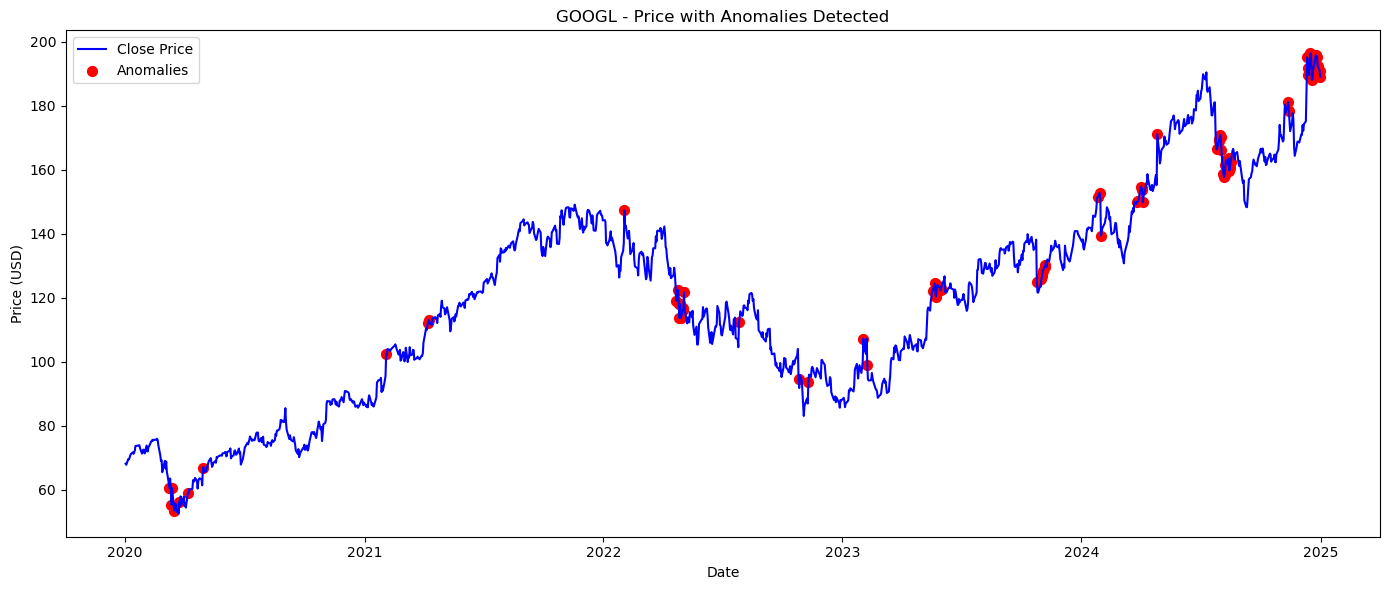

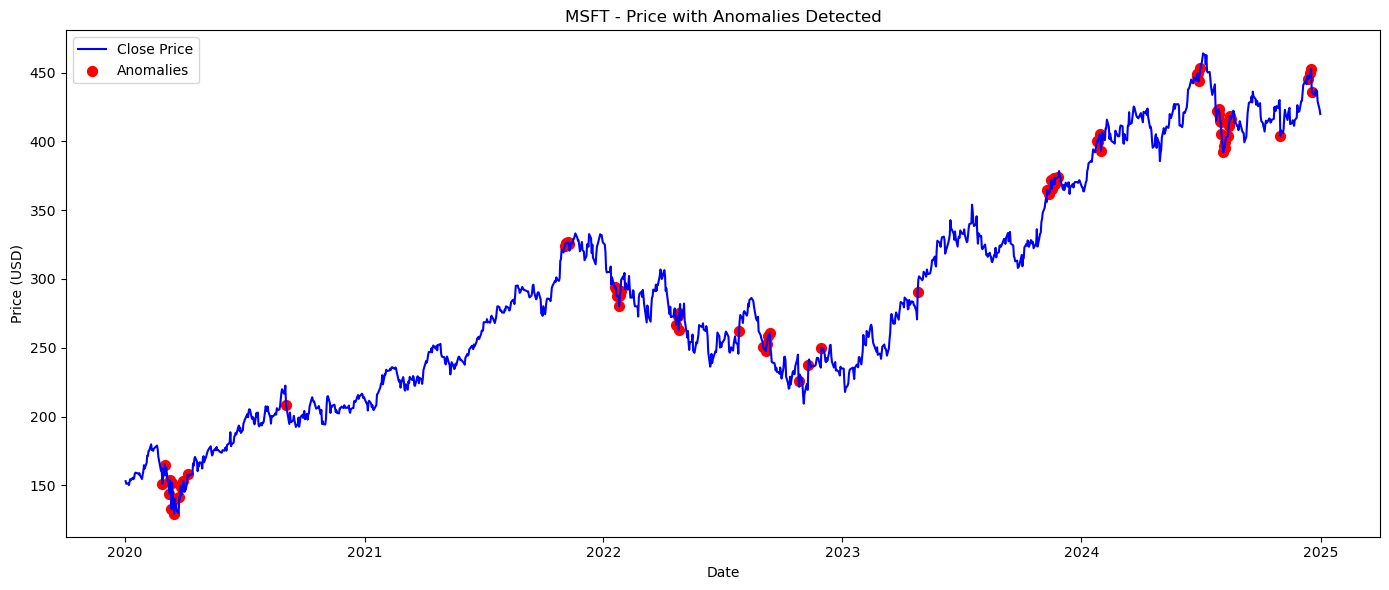

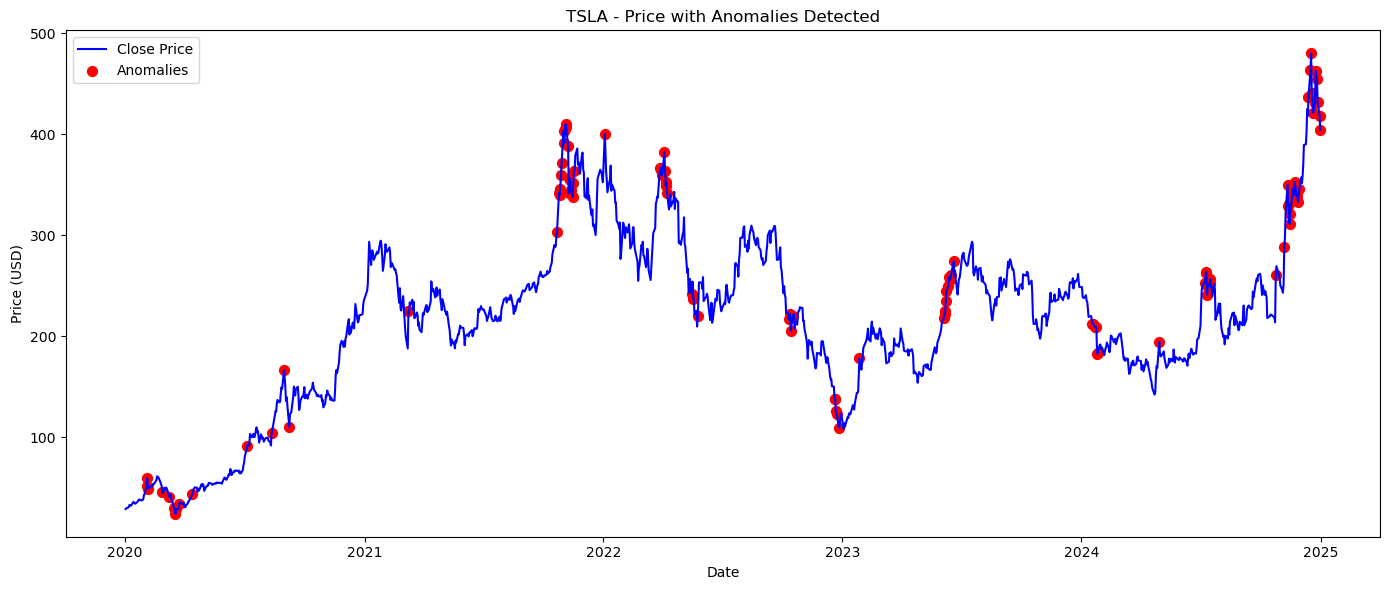

In [207]:
import matplotlib.pyplot as plt
import os

os.makedirs('outputs/graphs/graphs_secpart/anomalies', exist_ok=True)

for ticker in tickers:
    df = results[ticker]

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['close'], label='Close Price', color='blue', linewidth=1.5)

    anomalies = df[df['is_anomaly']]
    plt.scatter(anomalies.index, anomalies['close'], color='red', label='Anomalies', marker='o', s=50)

    plt.title(f"{ticker} - Price with Anomalies Detected")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.tight_layout()

    plt.savefig(f'outputs/graphs/graphs_secpart/anomalies/{ticker}_anomalies_on_price.png')
    plt.show()

In [226]:
import os
import pandas as pd

os.makedirs('../data/final', exist_ok=True)

# List to save the data frames of each action
combined_dfs = []

for ticker in tickers:
    df = results[ticker].copy()
    df['ticker'] = ticker  # We add the name of the action
    combined_dfs.append(df)

# Join all data frames
df_final = pd.concat(combined_dfs)

# Save final CSV 
df_final.to_csv('../data/final/df_model_ready.csv', index=True)

print("✅ Final dataset saved in: data/final/df_model_ready.csv")

✅ Final dataset saved in: data/final/df_model_ready.csv


## 🗂️ Dataset Summary and Features Description

The final dataset `df_model_ready.csv` includes all engineered features per company and is structured for supervised learning:

**Key Feature Groups:**
- **Price-based indicators:** `close`, `sma_10`, `sma_20`, `sma_50`, `sma_100`, `sma_200`, `ema_10`, `ema_20`, `ema_50`, `ema_100`, `ema_200`
- **Momentum indicators:** `rsi` (14-day), `macd`, `macd_signal`, `macd_hist`
- **Volatility measures:** `volatility_10`, `volatility_20`, `bollinger_sma` (20-day), `bollinger_upper`, `bollinger_lower`
- **Lag features:** `lag_1` to `lag_5` to capture time dependencies
- **Anomaly flags:** `is_anomaly_return`, `is_anomaly_rsi`, `is_anomaly_volatility`, and final `is_anomaly`
- **Returns:** `daily_return`, `cumulative_return`

**Dataset Shape:** One row per day per stock, from 2020 to 2024, across 5 tech companies.

This dataset is now ready for predictive modeling and machine learning experiments.